# 1.1 导入所有必需的库

In [11]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons # 一个用于分类的“月牙形”数据集
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 让图像在 Notebook 中直接显示
%matplotlib inline
# 设置图像的清晰度
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = ['STHeiti', 'AppleGothic', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False    # 负号正常显示

print("--- 1. 库已导入 ---")

--- 1. 库已导入 ---


# 1.2 创建我们的“演练场”

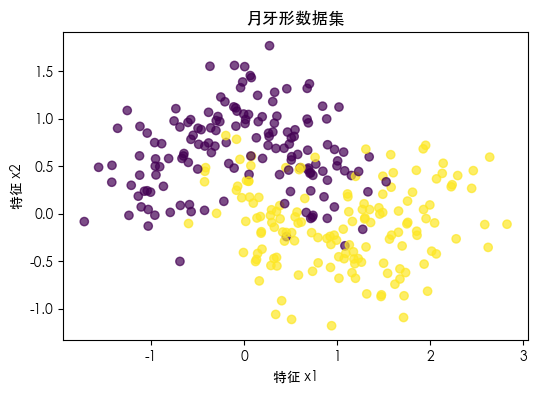

--- 2. 数据集已创建并显示 ---


In [12]:
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)

# 我们可以画出数据点，看看它长什么样
plt.figure(figsize=(6, 4)) # 创建一个小画布
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("月牙形数据集")
plt.xlabel("特征 x1")
plt.ylabel("特征 x2")
plt.show()

print("--- 2. 数据集已创建并显示 ---")

# 1.3 创建两个“驯兽师”（模型）

In [13]:
# 驯兽师A: “野蛮生长”（不剪枝）
tree_overfit = DecisionTreeClassifier(random_state=42)

# 驯兽师B: “严格管教”（预剪枝）
tree_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)

# 1.4 开始“驯服”！(训练模型)

In [14]:
tree_overfit.fit(X, y)
tree_pruned.fit(X, y)

print("--- 3. 两个模型都训练完成了！ ---")
print(f"'野蛮生长'的树，最终深度达到了: {tree_overfit.get_depth()}")
print(f"'严格管教'的树，最终深度是: {tree_pruned.get_depth()}")


--- 3. 两个模型都训练完成了！ ---
'野蛮生长'的树，最终深度达到了: 12
'严格管教'的树，最终深度是: 3


# 1.5 可视化对比：看看两棵树长什么样


--- 4. 正在生成对比图... ---


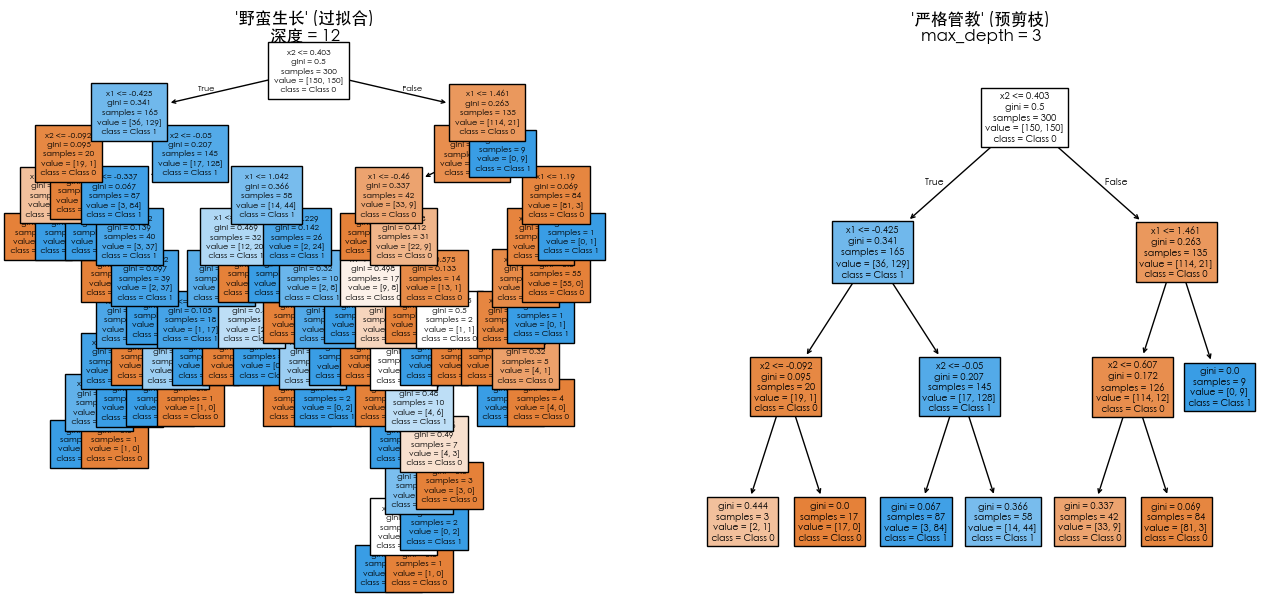

In [15]:

print("\n--- 4. 正在生成对比图... ---")

# 创建一个 1x2 的画布，用于并排比较
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

# --- 画左边的树 --- 
plot_tree(tree_overfit, 
          filled=True, 
          ax=axes[0], 
          feature_names=['x1', 'x2'], 
          class_names=['Class 0', 'Class 1'],
          fontsize=6) # 把字体调小一点，不然看不全

axes[0].set_title(f"'野蛮生长' (过拟合)\n深度 = {tree_overfit.get_depth()}", fontsize=12)

# --- 画右边的树 --- 
plot_tree(tree_pruned, 
          filled=True, 
          ax=axes[1], 
          feature_names=['x1', 'x2'], 
          class_names=['Class 0', 'Class 1'])

axes[1].set_title(f"'严格管教' (预剪枝)\nmax_depth = 3", fontsize=12)

plt.show()

# 2.1 导入“分卷子”和“打分”的工具

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("--- 1. 新工具已导入 ---")

--- 1. 新工具已导入 ---


# 2.2 自动“分卷子”
我们把 300 条数据，按 70% (训练集) 和 30% (测试集) 的比例分开
X_train, y_train 就是“家庭作业”
X_test, y_test 就是“期末考卷”（模型在训练时没见过）

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, # 30% 的数据用作测试
                                                    random_state=42) # 保证每次随机分的结果都一样

print(f"--- 2. '分卷子'完成 ---")
print(f"训练集 ('家庭作业') 数量: {len(X_train)}")
print(f"测试集 ('期末考卷') 数量: {len(X_test)}")

--- 2. '分卷子'完成 ---
训练集 ('家庭作业') 数量: 210
测试集 ('期末考卷') 数量: 90


# 2.3 重新训练我们的两个“驯兽师”
重点：这次我们【只】用“家庭作业”(train) 来训练它们！

In [18]:
print("\n--- 3. 正在用'家庭作业'重新训练模型... ---")

# 驯兽师A: “野蛮生长”（不剪枝）
tree_overfit = DecisionTreeClassifier(random_state=42)
tree_overfit.fit(X_train, y_train)

# 驯兽师B: “严格管教”（预剪枝）
tree_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_pruned.fit(X_train, y_train)

print("模型训练完毕！")


--- 3. 正在用'家庭作业'重新训练模型... ---
模型训练完毕！


# 2.4 “期末考试”开始！
让两个模型对它们【没见过的】“期末考卷”(X_test) 进行预测

In [19]:
y_pred_overfit = tree_overfit.predict(X_test)
y_pred_pruned = tree_pruned.predict(X_test)
print("\n--- 4. '期末考试'（预测）完成 ---")


--- 4. '期末考试'（预测）完成 ---


# 2.5 “阅卷打分” - 见证奇迹的时刻！

In [20]:

print("\n--- 5. 正在'阅卷打分'... ---")

# --- 评价“野蛮生长”的树 ---
print("\n--- “野蛮生长” (过拟合) 的树的成绩单 ---")
print(f"准确率 (Accuracy):   {accuracy_score(y_test, y_pred_overfit):.4f}")
print(f"精确率 (Precision): {precision_score(y_test, y_pred_overfit):.4f}")
print(f"召回率 (Recall):   {recall_score(y_test, y_pred_overfit):.4f}")
print(f"F1-Score:           {f1_score(y_test, y_pred_overfit):.4f}")

# --- 评价“严格管教”的树 ---
print("\n--- “严格管教” (预剪枝) 的树的成绩单 ---")
print(f"准确率 (Accuracy):   {accuracy_score(y_test, y_pred_pruned):.4f}")
print(f"精确率 (Precision): {precision_score(y_test, y_pred_pruned):.4f}")
print(f"召回率 (Recall):   {recall_score(y_test, y_pred_pruned):.4f}")
print(f"F1-Score:           {f1_score(y_test, y_pred_pruned):.4f}")


--- 5. 正在'阅卷打分'... ---

--- “野蛮生长” (过拟合) 的树的成绩单 ---
准确率 (Accuracy):   0.8556
精确率 (Precision): 0.8545
召回率 (Recall):   0.9038
F1-Score:           0.8785

--- “严格管教” (预剪枝) 的树的成绩单 ---
准确率 (Accuracy):   0.9000
精确率 (Precision): 0.9057
召回率 (Recall):   0.9231
F1-Score:           0.9143
